******iris['data']******* 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6

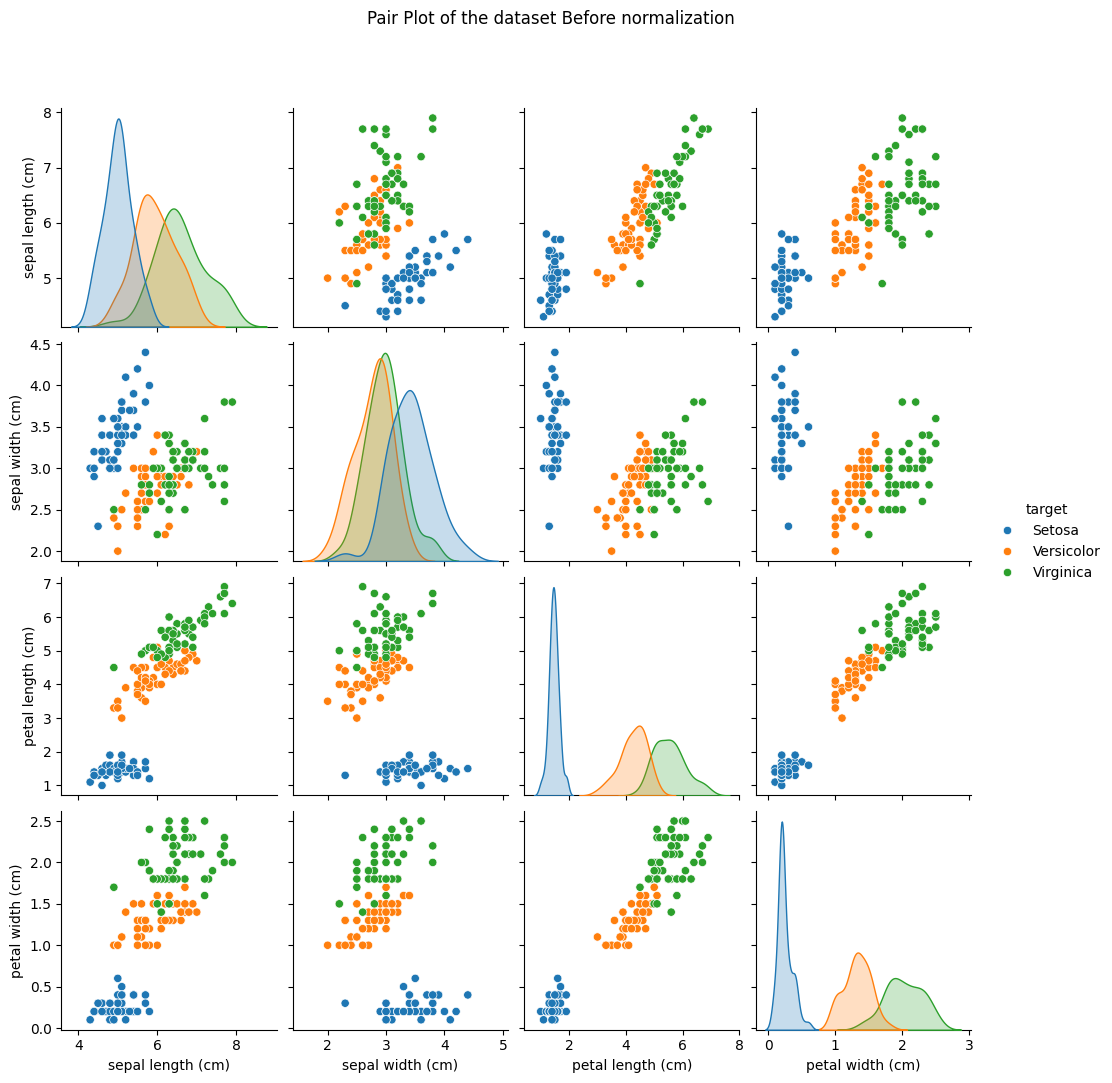

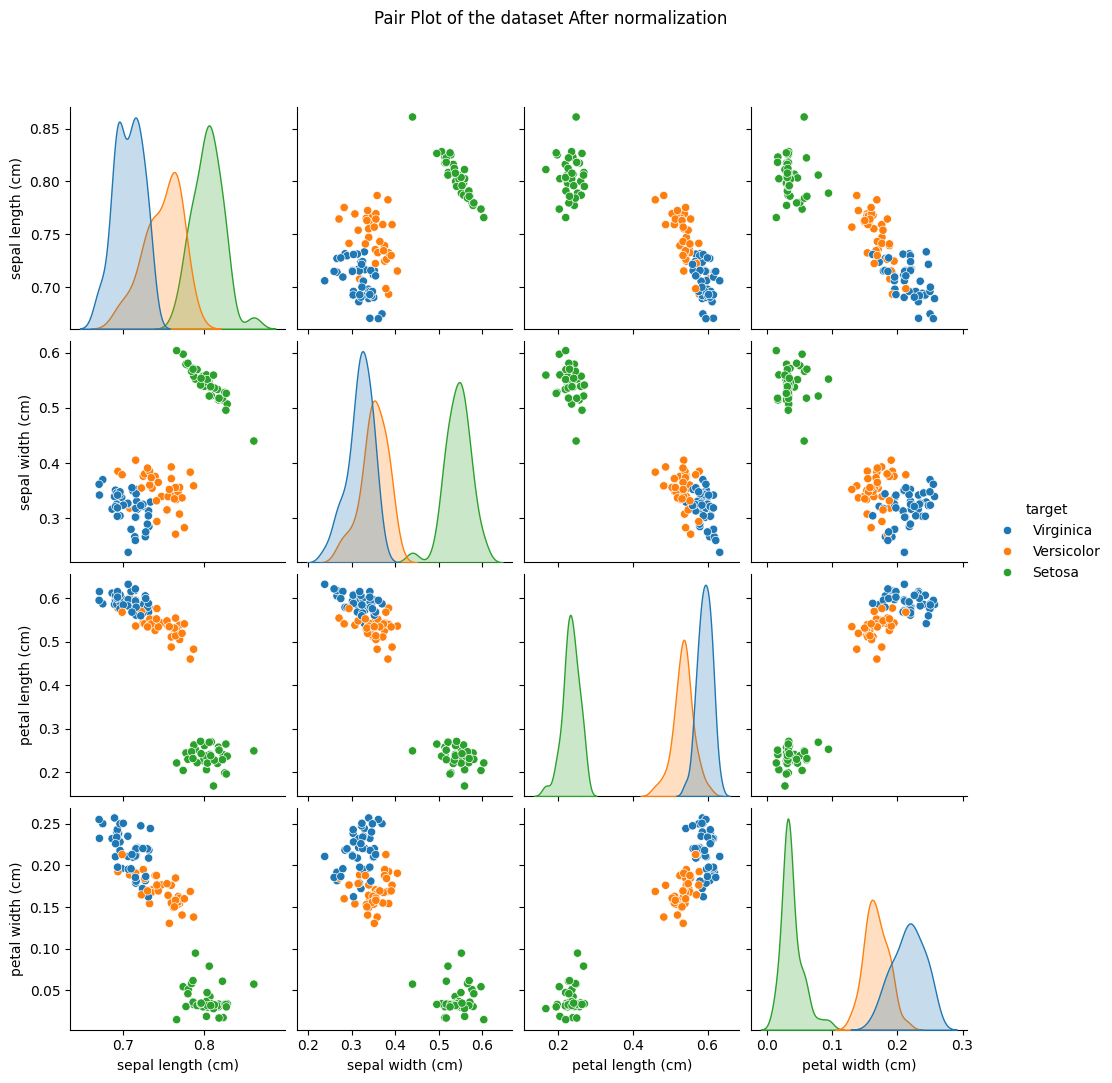

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

"""
Load the dataset

"""

iris = datasets.load_iris()
# np.c_ is the numpy concatenate function
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

print("******iris['data']******* \n",iris['data'])
print("\n")
print("******iris['feature_names']******* \n",iris['feature_names'])
print("\n")
print("******iris['target']******* \n",iris['target'])

"""#Describe the Dataset"""

iris_df.describe()

print("Iris dataframe first five rows: \n", iris_df.head())

"""#Split into X and Y"""

x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

print("*************************")
print("first five rows of x are: \n",x.head())
print("\n")
print("first five rows of y are: \n",y.head())
print("*************************")

print("*************************")
print("LAST five rows of x are: \n",x.tail())
print("\n")
print("LAST five rows of y are: \n",y.tail())
print("*************************")

"""#Split into training and testing"""

# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.array(x_train)
y_train= np.array(y_train)

x_test= np.array(x_test)
y_test= np.array(y_test)

"""#Print  the training data"""

print("x train data is: \n",x_train)
print("y train  data is: \n",y_train)

print("***************")
print("shape of x_train is: ", x_train.shape)
print("shape of y_train is: ", y_train.shape )
print("***************")

"""#Print the testing data"""

print("x test data is: \n",x_test)
print("y test  data is: \n",y_test)

print("***************")
print("shape of x_test is: ", x_test.shape)
print("shape of y_test is: ", y_test.shape )
print("***************")

print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

"""#Normalize the Dataset"""

scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

print('x train before Normalization')
print(x_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

print('x test before Normalization')
print(x_test[0:5])
print('\nx test after Normalization')
print(normalized_x_test[0:5])

print("normalized x_train \n", normalized_x_train)
print("************************")
print("normalized x_test \n", normalized_x_test)

"""#Visualize the Dataset before and after Normalization


"""

## Before
# View the relationships between variables; color code by species type
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

## After
iris_df_2= pd.DataFrame(data= np.c_[normalized_x_train, y_train],
                        columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

"""#KNN Step 1 (Euclidean Distance)"""

def distance_ecu(x_train, x_test_point):
  """
  Input:
    - x_train: corresponding to the training data
    - x_test_point: corresponding to the test point

  Output:
    -distances: The distances between the test point and each point in the training data.

  """
  distances= []  ## create empty list called distances
  print("length of x_train is: ", len(x_train))
  for row in range(len(x_train)): ## Loop over the rows of x_train
      print("**********************************")
      print("row number: ",row )
      current_train_point= x_train[row] #Get them point by point
      print("current train point is: \n", current_train_point)
      print("current test point is: \n", x_test_point)
      current_distance= 0 ## initialize the distance by zero

      for col in range(len(current_train_point)): ## Loop over the columns of the row
          current_distance += (current_train_point[col] - x_test_point[col]) **2
          ## Or current_distance = current_distance + (x_train[i] - x_test_point[i])**2
      current_distance= np.sqrt(current_distance)
      print("current distance is: ", current_distance)
      print("**********************************")
      distances.append(current_distance) ## Append the distances
      print("distance is: ", distances)
      print("***********************\n")
  # Store distances in a dataframe
  distances= pd.DataFrame(data=distances,columns=['dist'])
  print("shape of distances is: ", distances.shape)
  return distances

"""#KNN Step 2 (Find the nearest neighbors)


"""

def nearest_neighbors(distance_point, K):
    """
    Input:
        -distance_point: the distances between the test point and each point in the training data.
        -K             : the number of neighbors

    Output:
        -df_nearest: the nearest K neighbors between the test point and the training data.

    """
    print("*******step 2**********")
    print("value of k is: ", K)

    # Sort values using the sort_values function
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)
    print("df_nearest at axis 0", df_nearest)

    ## Take only the first K neighbors
    df_nearest= df_nearest[:K]
    print("df_nearest[:k]", df_nearest)
    return df_nearest

"""#KNN Step 3 (Classify the point based on a majority vote)


"""

def voting(df_nearest, y_train):
    """
    Input:
        -df_nearest: dataframe contains the nearest K neighbors between the full training dataset and the test point.
        -y_train: the labels of the training dataset.

    Output:
        -y_pred: the prediction based on Majority Voting

    """
    print("\n")
    print("\n")
    print("*************step 3*************")
    ## Use the Counter Object to get the labels with K nearest neighbors.
    counter_vote= Counter(y_train[df_nearest.index])
    print("counter_vote value is: ", counter_vote)

    y_pred= counter_vote.most_common()[0][0]   # Majority Voting

    return y_pred

"""#KNN Full Algorithm: Putting Everything Together

https://deepnote.com/@ndungu/Implementing-KNN-Algorithm-on-the-Iris-Dataset-e7c16493-500c-4248-be54-9389de603f16
"""

def KNN_from_scratch(x_train, y_train, x_test, K):

    """
    Input:
    -x_train: the full training dataset
    -y_train: the labels of the training dataset
    -x_test: the full test dataset
    -K: the number of neighbors

    Output:
    -y_pred: the prediction for the whole test set based on Majority Voting.

    """

    y_pred=[]

    ## Loop over all the test set and perform the three steps
    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)  ## Step 1
      df_nearest_point= nearest_neighbors(distance_point, K)  ## Step 2
      y_pred_point    = voting(df_nearest_point, y_train) ## Step 3
      y_pred.append(y_pred_point)

    return y_pred

"""#Test the KNN Algorithm on the test dataset"""

K=3
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

"""#Compare our implementation with Sklearn library


"""

model=KNeighborsClassifier(K)
model.fit(normalized_x_train, y_train)
y_pred_sklearn= model.predict(normalized_x_test)
print(y_pred_sklearn)

"""#Check if the output is exactly the same


"""

print(np.array_equal(y_pred_sklearn, y_pred_scratch))

"""#Calculate the accuracy of both methods


"""

print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_scratch)}')
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred_sklearn)}')

In [24]:
import pickle
filename= 'saved_model.sav'
try:
    with open(filename,'wb')as file:
        pickle.dump(model, file)
    print("model saved successfully")
except Exception as e:
    print(f"error saving the model : {e}")

model saved successfully


In [29]:
load_model= pickle.load(open(filename,'rb'))
load_model.predict([[4,3,1,5]])


array([2.])